In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("data/sqisland.csv")
data.head()
positions, genes = data[["X", "Y"]], data.drop(["X", "Y"], axis=1)

## Q1

Text(0.5, 0.5, 'Locus 2')

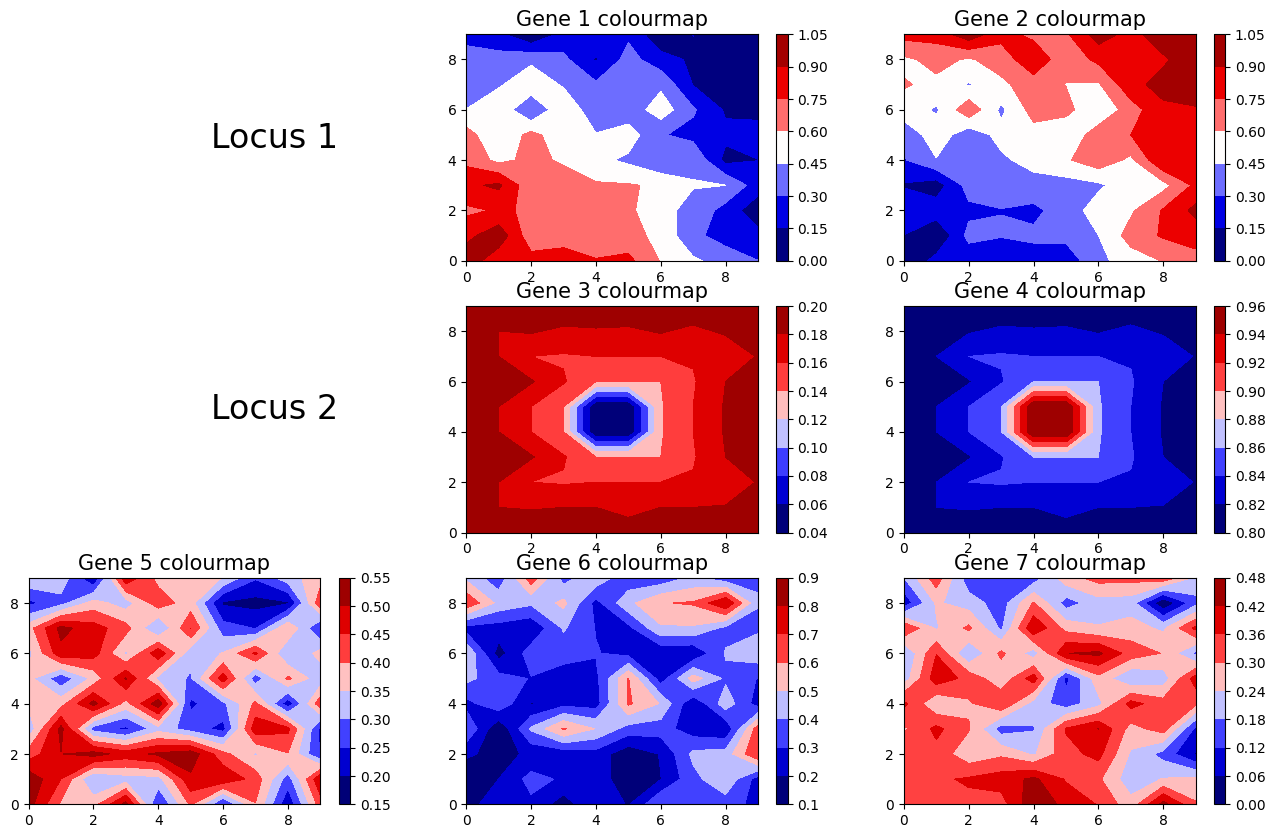

In [39]:
fig, ax = plt.subplots(3, 3, figsize=(16, 10))
locations = {1: 1, 2: 2, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8}
for i in range(1, 8):
    axis = ax.ravel()[locations[i]]
    axis.set_title(f"Gene {i} colourmap", size=15)
    plt.colorbar(
        axis.contourf(data[f"Gene{i}"].to_numpy().reshape((10, 10)), cmap="seismic")
    )

ax[0][0].set_axis_off()
ax[0][0].text(0.5, 0.5, "Locus 1", size=24)

ax[1][0].set_axis_off()
ax[1][0].text(0.5, 0.5, "Locus 2", size=24)

## Q2

## Hunter-gatherers
* Locus 1
    * From the colour maps, it is evident that gene 1 has a higher frequency in the south-western corner of the island, while the north-eastern corner is dominated by gene 2 in locus 1. From the task description we can then assume that since the population of farmers first settled in the southwest, the increased frequency of gene 1 can be linked to their arrival. Therefore, we can assume that gene 2 was the most common allele in locus 1 for the hunter-gatherer population
* Locus 2
    * The ring-like heatmaps of gene 4 in locus 2 suggest that the population with a lower frequency of this gene is situated around the island's shore. It can then be assumed that the seafarer population brought along an increased level of gene 3 and therefore a lower frequency of gene 4, spreading this trend from the shores inwards. It can therefore be assumed that the hunter-gatherer population's dominant gene in locus 2 was gene 4.
## Farmers
* Locus 1
    * By applying the same logic as above, it can be suggested that gene 1 dominates the 1st locus in farmers as its frequency is highest in the south-west and decreases as the population spreads in the north-eastern direction. 
* Locus 2
    * The colour maps provide little information on the most frequent gene in locus 2 for farmers. The maps do not exhibit any patterns that can be associated with the north-east spread of the farmer population, suggesting that the seafarer population has more influence in the second locus. Therefore, it is difficult to determine whether any gene is more popular than another in locus 2 for the farmer population  

## Q3

As described above, the seafarer population has a clearly increased popularity of gene 3 in locus 2. Furthermore, it can be suggested that gene 7 has heightened frequency in the population, as the ''hot spots'' of gene 7 on the contour plot are mainly distributed around the coast (though, it is also concentrated in the north east, suggesting that the same can be said about the farmer population)

## Q4

In [40]:
genes.var(axis=0)

Gene1    0.061194
Gene2    0.061194
Gene3    0.001095
Gene4    0.001095
Gene5    0.009610
Gene6    0.020981
Gene7    0.009166
dtype: float64

## Q5

In [41]:
print(
    f"Correlation between genes 1 and 4: {data['Gene1'].corr(data['Gene4'], method='pearson')}"
)
print(
    f"Correlation between genes 1 and 5: {data['Gene1'].corr(data['Gene5'], method='pearson')}"
)

Correlation between genes 1 and 4: 0.07526456660171588
Correlation between genes 1 and 5: 0.36012032407985833


## Q6

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
pca.fit(genes)
new_data = pd.DataFrame(pca.fit_transform(genes))
new_data.rename(
    columns=dict(enumerate(f"Principal component {index}" for index in range(8))),
    inplace=True,
)
new_data.var(axis=0)

Principal component 0    1.322461e-01
Principal component 1    2.168072e-02
Principal component 2    8.267649e-03
Principal component 3    2.141399e-03
Principal component 4    6.535767e-20
Principal component 5    1.054879e-33
Principal component 6    1.886793e-33
dtype: float64

## Q7

In [43]:
pre_pca_var = genes.var(axis=0)
post_pca_var = new_data.var(axis=0)
print(sum(pre_pca_var), sum(post_pca_var))
np.isclose(sum(pre_pca_var), sum(post_pca_var))

0.16433592209080264 0.1643359220908028


True

This result is to be expected, the values are not quite equal due to floating point arithmetics

## Q8

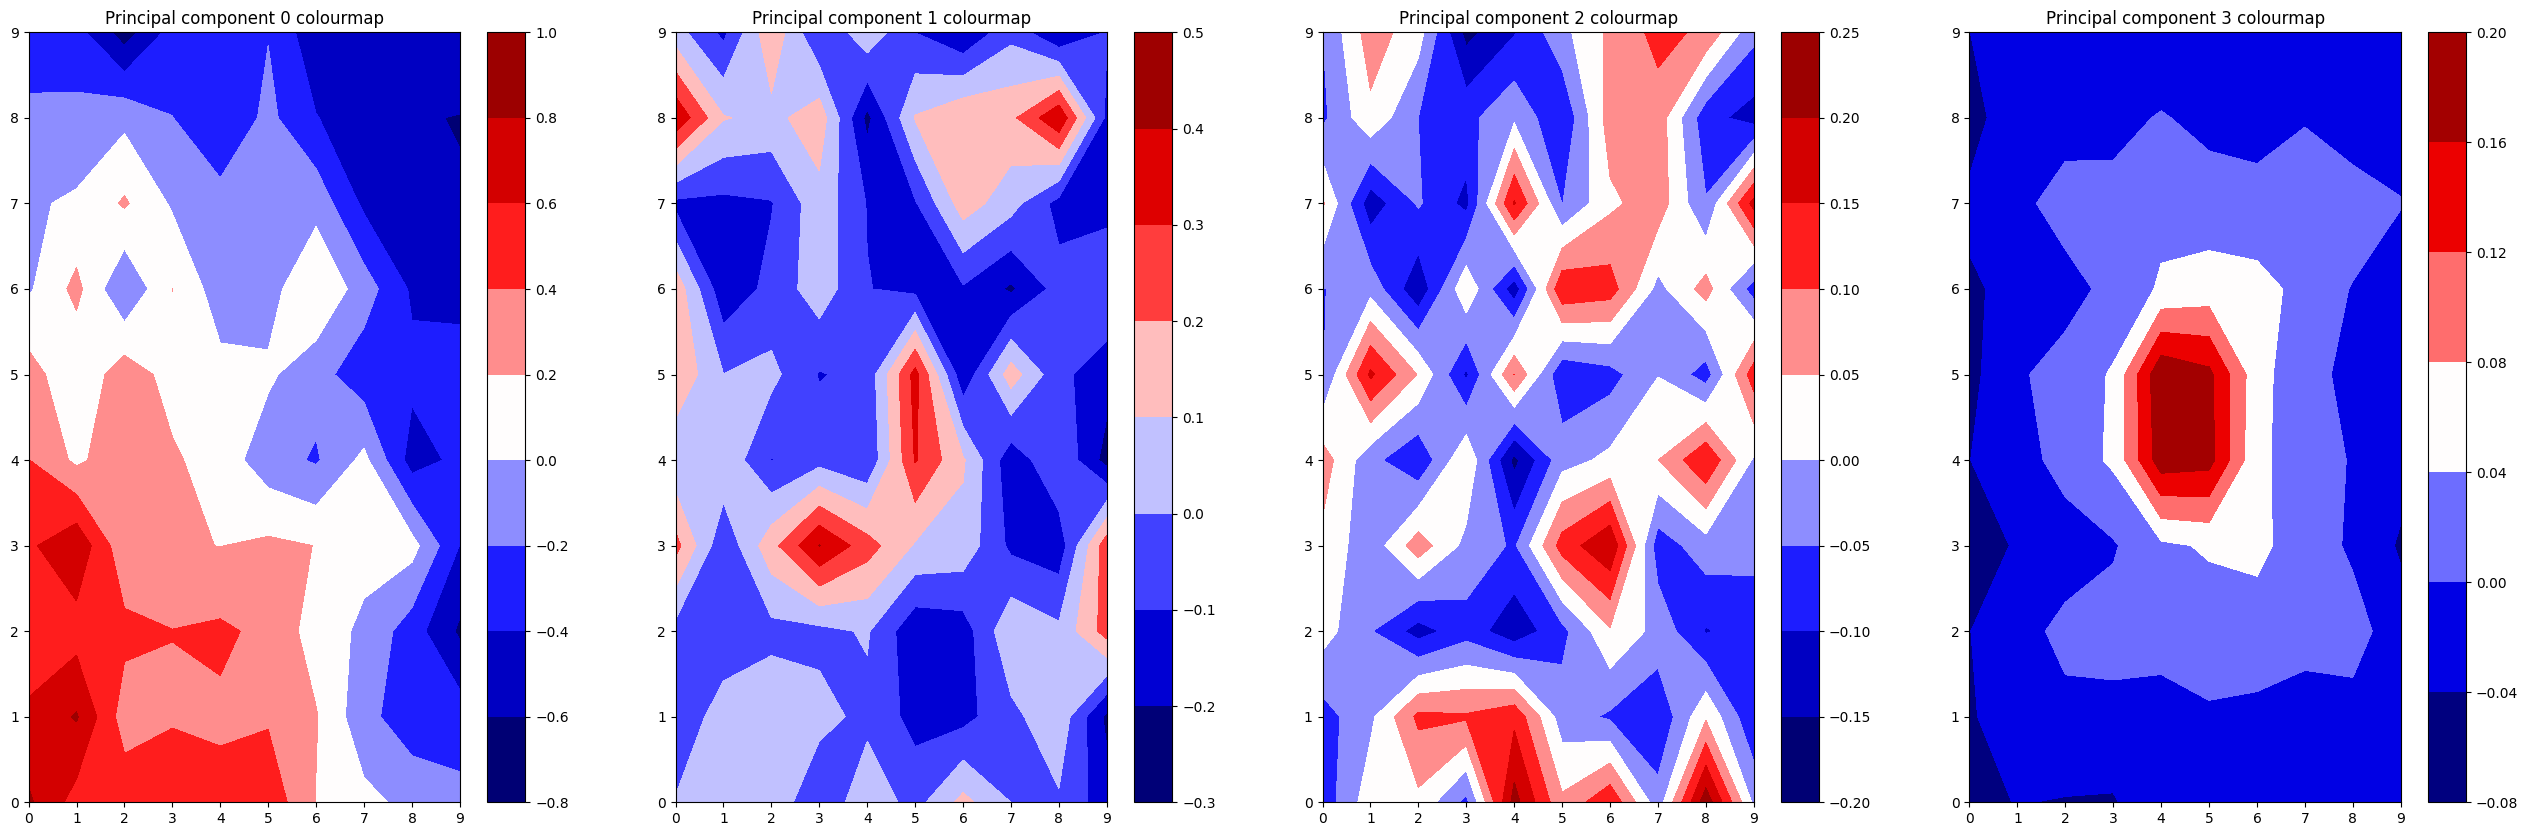

In [44]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(32, 10))
ax1.set_title("Principal component 0 colourmap")
plt.colorbar(
    ax1.contourf(
        new_data["Principal component 0"].to_numpy().reshape((10, 10)), cmap="seismic"
    )
)

ax2.set_title("Principal component 1 colourmap")
plt.colorbar(
    ax2.contourf(
        new_data["Principal component 1"].to_numpy().reshape((10, 10)), cmap="seismic"
    )
)

ax3.set_title("Principal component 2 colourmap")
plt.colorbar(
    ax3.contourf(
        new_data["Principal component 2"].to_numpy().reshape((10, 10)), cmap="seismic"
    )
)

ax4.set_title("Principal component 3 colourmap")
plt.colorbar(
    ax4.contourf(
        new_data["Principal component 3"].to_numpy().reshape((10, 10)), cmap="seismic"
    )
)

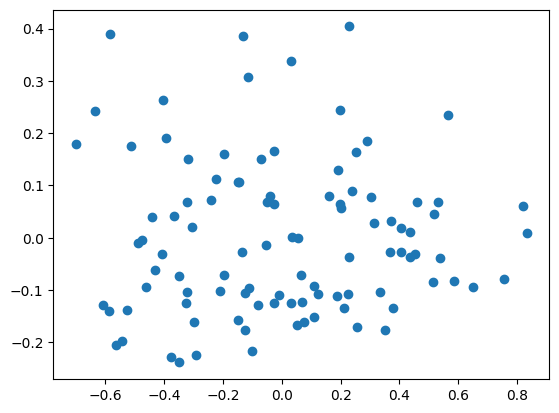

In [46]:
plt.scatter(new_data["Principal component 0"], new_data["Principal component 1"])